Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading The data 

In [2]:
df=pd.read_csv("./Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Changing Yes or No to Boolean

In [4]:
df.replace('yes',1,inplace=True)
df.replace('no',0,inplace=True)

C:\Users\itzso\AppData\Local\Temp\ipykernel_37952\1266729993.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('no',0,inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


Encoding The FurnishingStatus

In [6]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [7]:
df.replace('unfurnished',0,inplace=True)
df.replace('furnished',2,inplace=True)
df.replace('semi-furnished',1,inplace=True)

C:\Users\itzso\AppData\Local\Temp\ipykernel_37952\2902452385.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('semi-furnished',1,inplace=True)


In [8]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


Splitting the data into train and test

In [9]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
X=df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]
y=df['price']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
510,2880,3,1,1,0,0,0,0,0,0,0,0
179,3180,3,2,2,1,0,0,0,0,2,0,1
482,3150,3,1,2,0,0,0,0,0,0,0,0
342,7152,3,1,2,1,0,0,0,1,0,0,2
491,2640,2,1,1,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
271,1905,5,1,2,0,0,1,0,0,0,0,1
341,3180,2,2,1,1,0,1,0,0,2,0,1
516,3240,2,1,1,0,1,0,0,0,1,0,0
222,9166,2,1,1,1,0,1,0,1,2,0,1


In [24]:
X_test[y_test==12215000]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


Feature Scaling the Training and Test data

In [12]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
data=scaler.fit_transform(X_train[['area']])
X_train[['area']]=data

In [13]:
d=scaler.fit_transform(X_test[['area']])
X_test['area']=d
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
510,-0.477987,3,1,1,0,0,0,0,0,0,0,0
179,-0.383648,3,2,2,1,0,0,0,0,2,0,1
482,-0.393082,3,1,2,0,0,0,0,0,0,0,0
342,0.865409,3,1,2,1,0,0,0,1,0,0,2
491,-0.553459,2,1,1,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
271,-0.784591,5,1,2,0,0,1,0,0,0,0,1
341,-0.383648,2,2,1,1,0,1,0,0,2,0,1
516,-0.364780,2,1,1,0,1,0,0,0,1,0,0
222,1.498742,2,1,1,1,0,1,0,1,2,0,1


In [14]:
de=pd.DataFrame(y_test,columns=['price'])
de

,price
510,2520000
179,5215000
482,2940000
342,3850000
491,2835000
...,...
271,4340000
341,3850000
516,2450000
222,4760000


In [15]:
ded=pd.DataFrame(y_train,columns=['price'])
ded

,price
318,4060000
226,4690000
132,5810000
14,9240000
427,3332000
...,...
398,3500000
15,9100000
377,3640000
163,5425000


merging the y and x to export

In [16]:
merged_train = pd.concat([X_train, ded], axis=1)
merged_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
318,-0.095238,3,1,1,1,0,0,0,0,0,0,1,4060000
226,0.208791,3,1,4,1,0,0,0,1,0,0,1,4690000
132,0.219780,3,1,3,1,0,0,0,1,0,0,1,5810000
14,1.172161,3,2,2,1,0,0,0,0,0,1,1,9240000
427,-0.899267,3,1,2,1,0,1,0,0,0,1,2,3332000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,-0.542125,3,1,2,1,0,0,0,0,1,0,0,3500000
15,0.512821,4,1,2,1,0,1,0,0,2,0,1,9100000
377,-0.641026,3,2,2,0,0,1,0,0,0,1,0,3640000
163,0.815018,3,1,1,1,1,1,0,1,0,1,1,5425000


In [17]:
merged_test = pd.concat([X_test, de], axis=1)
merged_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
510,-0.477987,3,1,1,0,0,0,0,0,0,0,0,2520000
179,-0.383648,3,2,2,1,0,0,0,0,2,0,1,5215000
482,-0.393082,3,1,2,0,0,0,0,0,0,0,0,2940000
342,0.865409,3,1,2,1,0,0,0,1,0,0,2,3850000
491,-0.553459,2,1,1,0,0,0,0,0,1,0,2,2835000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,-0.784591,5,1,2,0,0,1,0,0,0,0,1,4340000
341,-0.383648,2,2,1,1,0,1,0,0,2,0,1,3850000
516,-0.364780,2,1,1,0,1,0,0,0,1,0,0,2450000
222,1.498742,2,1,1,1,0,1,0,1,2,0,1,4760000


Export The train and test

In [18]:
merged_test.to_csv('./test.csv')
merged_train.to_csv('./train.csv')

Some Graph

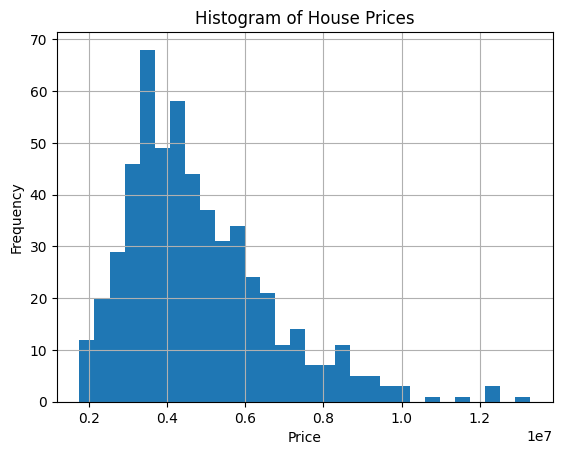

In [19]:
df['price'].hist(bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of House Prices')
plt.show()

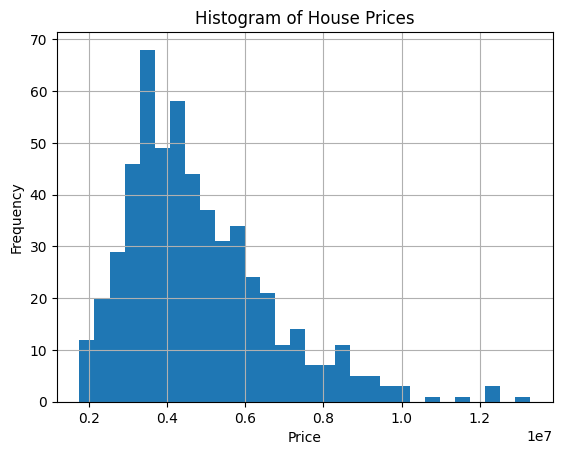

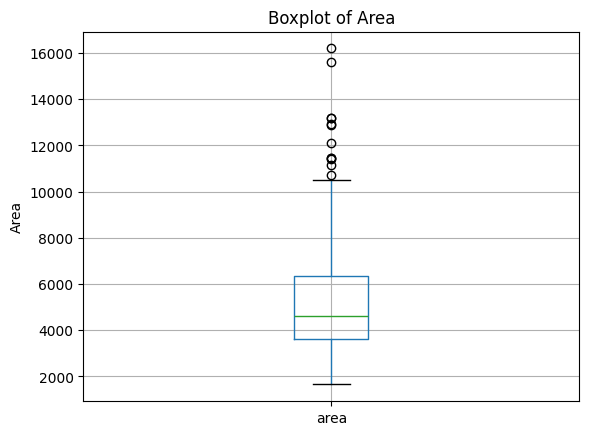

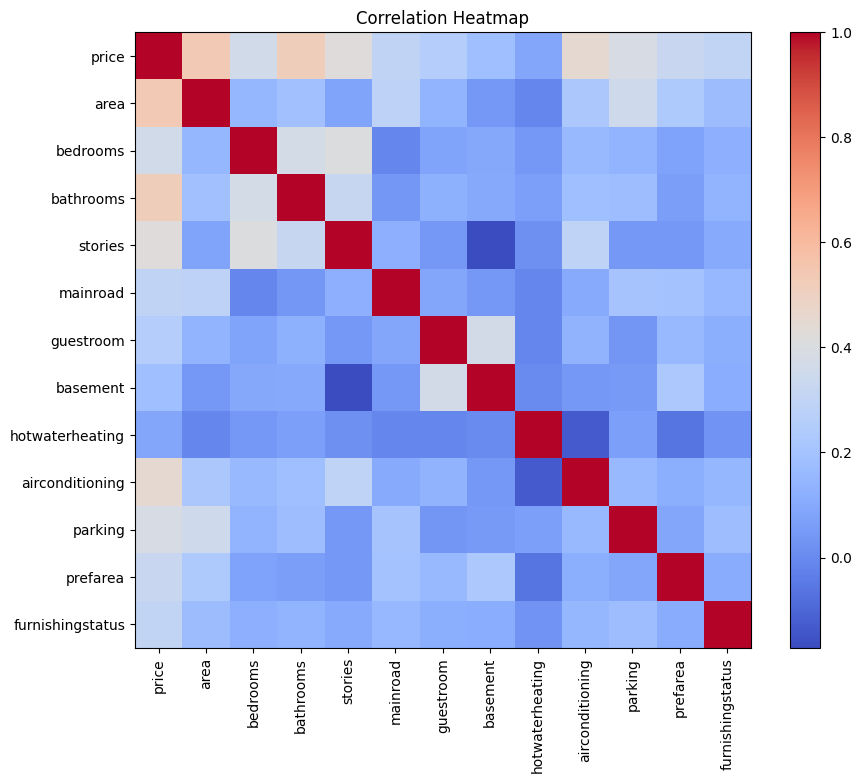

In [20]:
df['price'].hist(bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of House Prices')
plt.show()

# Boxplot for 'area'
plt.figure()
df.boxplot(column='area')
plt.title('Boxplot of Area')
plt.ylabel('Area')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
df.iloc[:,:-1]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


In [22]:
df['bathrooms'].unique()

array([2, 4, 1, 3])

<BarContainer object of 4 artists>

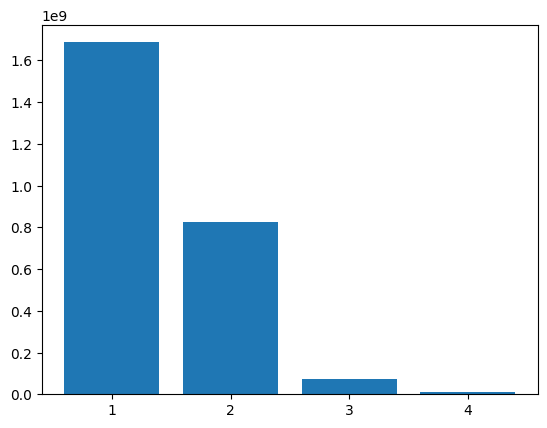

In [23]:
xxx=[np.sum(df[df['bathrooms']==1]['price']),np.sum(df[df['bathrooms']==2]['price']),np.sum(df[df['bathrooms']==3]['price']),np.sum(df[df['bathrooms']==4]['price'])]
plt.bar(['1','2','3','4'],xxx)
